In [1]:
import ect
from ect_optim import ECTAntialiasOptimizer
import matplotlib.pyplot as plt
import numpy as np
import cv2

radius = 200
img_offset = radius/10
ect_offset = radius/5

n_knots = 10

def rms(x: np.ndarray) -> float:
    rms_ = np.sqrt((x*np.conj(x)).sum().sum())
    return rms_

def rmsnorm(x: np.ndarray) -> np.ndarray:
    rms = np.sqrt((x*np.conj(x)).sum().sum())
    return x/rms

def snr(image: cv2.Mat, template: cv2.Mat):
    snr_lin = (1/rms((rmsnorm(image) - rmsnorm(template))))
    return 20*np.log10(snr_lin)

opt = ECTAntialiasOptimizer(
    image_path = "../sample_imgs/half.png",
    radius = radius,
    img_offset = img_offset,
    ect_offset = ect_offset,
    loss_fcn = lambda x, y: -snr(x, y)
)

## Show the shape of loss function

In [2]:
# ect_aas = np.linspace(1.2, 1.8, 10)
# iect_aas = np.linspace(1.2, 1.8, 10)

# # loss_fn = lambda x: opt.loss([1.50, x])

# ect_aas_, iect_aas_ = np.meshgrid(ect_aas, iect_aas)

# losses = np.zeros_like(ect_aas_)

# for x, e_aa in enumerate(ect_aas):
#     for y, ie_aa in enumerate(iect_aas):

#         losses[x, y] = opt.loss([e_aa, ie_aa])

# # losses = np.array(list(map(loss_fn, ect_aas)))

In [3]:
# from matplotlib import cm
# plt.figure(figsize=(10, 10))
# ax = plt.subplot(projection = "3d")
# ax.plot_surface(ect_aas_[::-1, :], iect_aas_, losses[::-1, :], cmap=cm.coolwarm)

In [4]:
result = opt.optim()

# solution = result['x'][0]


Current loss=-12.827
Current loss=-12.842
Current loss=-12.849
Current loss=-12.850
Current loss=-12.851
Current loss=-12.851
Current loss=-12.851
Current loss=-12.851
Current loss=-12.851
Current loss=-12.851


In [5]:
result

      fun: -12.850793803813911
 hess_inv: array([[0.02907883, 0.0228465 ],
       [0.0228465 , 0.55760504]])
      jac: array([-1.54972076e-06, -3.57627869e-06])
  message: 'Optimization terminated successfully.'
     nfev: 39
      nit: 10
     njev: 13
   status: 0
  success: True
        x: array([1.56879088, 1.37855506])

opt.loss(solution)=-12.850793803813911


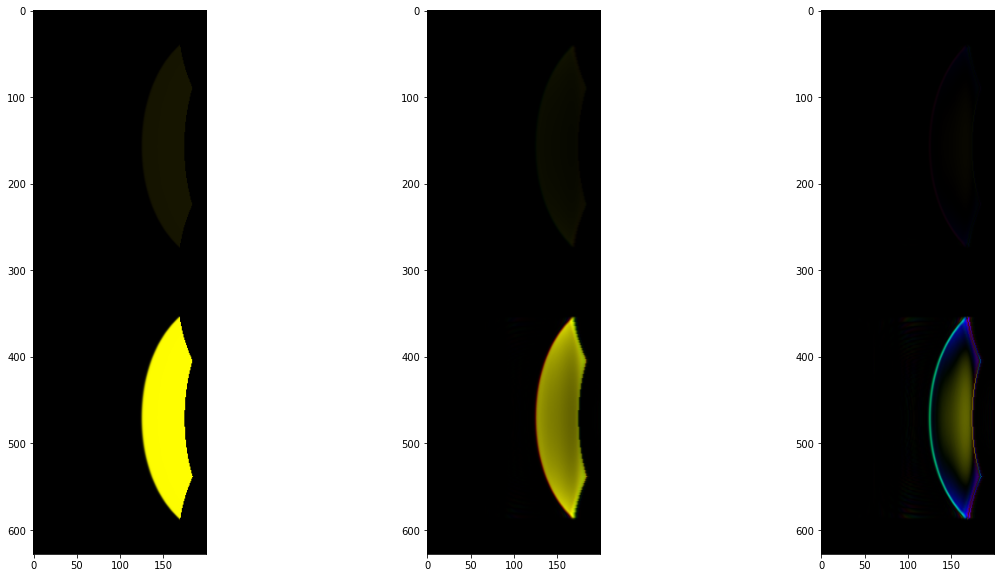

In [6]:
solution = result['x']

opt.show_result(rmsnorm)

print(f"{opt.loss(solution)=}")
# print(f"{opt.loss_sidelobe(solution)=}")

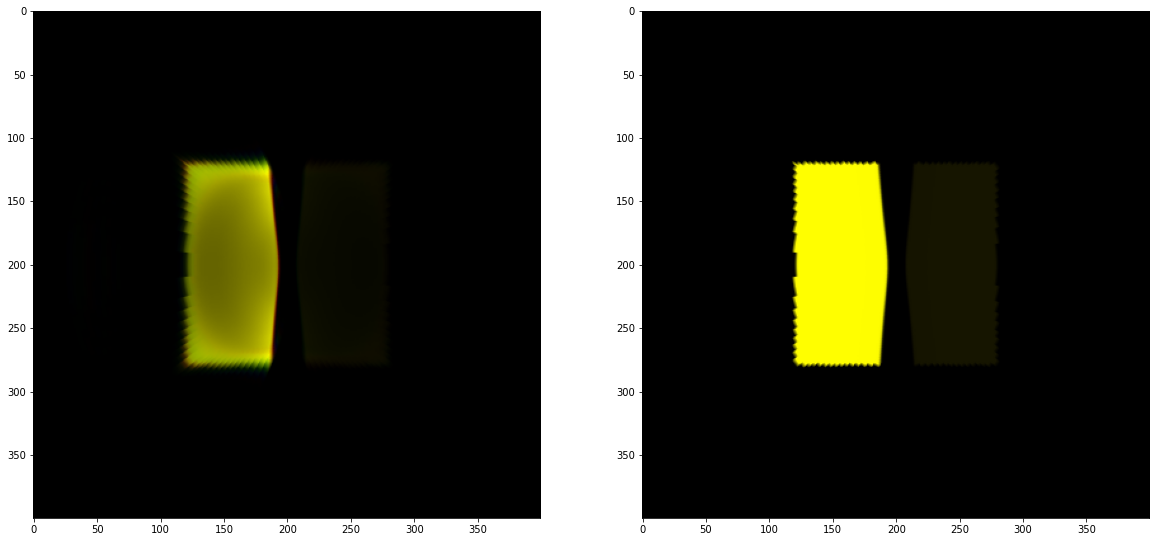

In [7]:
inv_img = ect.ilogpolar(ect.complex_to_hsv(opt.inv), radius=radius, offset=img_offset)
src_img = ect.ilogpolar(ect.complex_to_hsv(opt.image), radius=radius, offset=img_offset)

plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.imshow(inv_img)

plt.subplot(1, 2, 2)
plt.imshow(src_img)